In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from IPython.display import clear_output

In [3]:
def l_matrix(n=100):
    return np.eye(n)*2 - np.eye(n,k=1) - np.eye(n,k=-1)

In [4]:
N = 100
the_matrix = l_matrix(N)
the_matrix = the_matrix@the_matrix

In [5]:
def fixed_point_iterations(A, n = 1000, initial_vector = None, ):
    
    if initial_vector is None:
        initial_vector = np.random.rand(A.shape[0])
        
    u = np.copy(initial_vector)
    
    eigenvalues = []
    
    for i in range(n):
        u /= np.linalg.norm(u)
        u = A@u
        
        eigenvalue = np.dot(A@u, u)/np.dot(u,u)
        eigenvalues.append(eigenvalue)
        
    
    
    return eigenvalue, np.asarray(eigenvalues)

# Максимальное собственное число

In [6]:
# we should get:
np.linalg.eigh(the_matrix)[0][-1]

15.992261452603092

In [7]:
fixed_point_iterations(the_matrix, 10**4)[0]

15.992261452603087

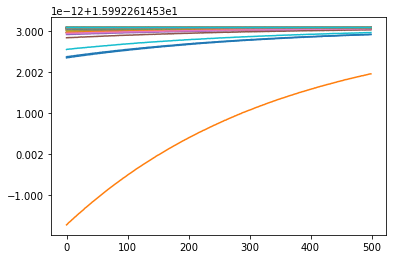

In [8]:
for i in range(50):
    # plot current eigval on each step with different initializations
    plt.plot(fixed_point_iterations(the_matrix, 10**4)[1][-500:])

# Минимальное собственное число

In [9]:
# we should get:
np.linalg.eigh(the_matrix)[0][0]

9.359312824813829e-07

In [10]:
1/(fixed_point_iterations(np.linalg.inv(the_matrix), 10**4)[0])

9.359312841629089e-07

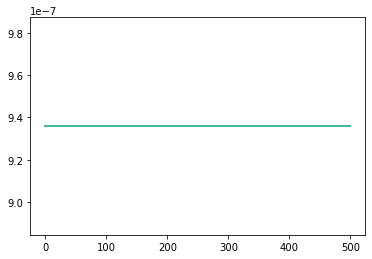

In [11]:
for i in range(50):
    # plot current eigval on each step with different initializations
    plt.plot(1/(fixed_point_iterations(np.linalg.inv(the_matrix), 10**4))[1][-500:])

# TODO:
add (accuracy -> num_iters)

# Метод Якоби

In [20]:
A = l_matrix(3)

In [12]:
c = np.cos(np.pi/4)
s = np.sin(np.pi/4)

def get_T(A,i,j,eps=1e-6):
    
    n = len(A)
    
    T = np.eye(n)
    
    if A[i,i] - A[j,j] < eps:
        
        T[i,i] = c
        T[i,j] = -s
        T[j,i] = s
        T[j,j] = c
        
    else:       
        
        tau = (A[i,i] - A[j,j]) / (2 * A[i,j])
        t = 1 / (tau + np.sign(tau)*np.sqrt(1 + tau**2))
        
        cos = 1 / np.sqrt(1 + t**2)
        sin = cos * t
        
        T[i,i] = cos
        T[i,j] = -sin
        T[j,i] = sin
        T[j,j] = cos
        
    return T

def Jacobi(A, eps=1e-6):
    n = len(A)
    while np.linalg.norm(A - np.diag(np.diag(A))) > eps:
        for i in range(0,n-1):
            for j in range(i+1,n):
                T = get_T(A,i,j,eps=eps)
                A = T.T @ A @ T
    return A

# optimized

In [321]:
c = np.cos(np.pi/4)
s = np.sin(np.pi/4)
def get_cs(A,i,j,eps=1e-6):
    
    if A[i,i] - A[j,j] < eps:
        
        return (c,s)
    
    else:       
        
        tau = (A[i,i] - A[j,j]) / (2 * A[i,j])
        t = 1 / (tau + np.sign(tau)*np.sqrt(1 + tau**2))
        
        cos = 1 / np.sqrt(1 + t**2)
        sin = cos * t
        
        return (cos,sin)

In [322]:
def Jacobi_optimized(A, eps=1e-6):
    n = len(A)
    while np.linalg.norm(A - np.diag(np.diag(A))) > eps:
        for i in range(0,n-1):
            for j in range(i+1,n):
                
                T = get_T_subm(A,i,j,eps=eps)
                cos,sin = get_cs(A,i,j,eps=eps)
                # T.T@A
                new_A = np.copy(A)
                T=T.T
                new_A[i,:] = cos * A[i,:] + sin * A[j,:]
                new_A[j,:] = -sin * A[i,:] + cos * A[j,:]
                
                # (T.T@A)@T
                A = np.copy(new_A)
                T=T.T
                A[:,i] = new_A[:,i]*cos + new_A[:,j]*sin
                A[:,j] = new_A[:,i]*-sin + new_A[:,j]*cos
    return A

In [343]:
A = l_matrix(10)

In [344]:
print(sorted(np.linalg.eigh(A)[0])[::-1])

[3.9189859472289945, 3.682507065662363, 3.30972146789057, 2.830830026003773, 2.284629676546571, 1.7153703234534297, 1.1691699739962276, 0.69027853210943, 0.3174929343376377, 0.08101405277100547]


In [346]:
print(sorted(np.diag(Jacobi(A)))[::-1])

[3.9189859472290043, 3.6825070656623704, 3.309721467890586, 2.830830026003783, 2.284629676546579, 1.7153703234534394, 1.1691699739962313, 0.6902785321094326, 0.31749293433763864, 0.08101405277100573]


In [345]:
print(sorted(np.diag(Jacobi_optimized(A)))[::-1])

[3.9189859472290043, 3.6825070656623704, 3.309721467890586, 2.830830026003783, 2.284629676546579, 1.7153703234534394, 1.1691699739962313, 0.6902785321094326, 0.31749293433763864, 0.08101405277100573]


# complexity

In [407]:
def complexity_plots(num_tests, max_size,min_size=4):
    unmod_times = []
    opt_times = []
    for n in range(min_size,max_size+1):
        clear_output()
        print('Testing for n = %d'%n)
        total_time_unmod = 0
        total_time_opt = 0
        for test in range(num_tests):

            A = l_matrix(n)
            start_time = time()
            _ = Jacobi(A)
            total_time_unmod += time() - start_time


            A = l_matrix(n)
            start_time = time()
            _ = Jacobi_optimized(A)
            total_time_opt += time() - start_time

        unmod_times.append(total_time_unmod/num_tests)
        opt_times.append(total_time_opt/num_tests)
        
        
    #linear plot
    plt.plot(list(range(min_size,max_size+1)),unmod_times,label='Unmodified Jacobi')
    plt.plot(list(range(min_size,max_size+1)),opt_times,label='Optimized Jacobi')
    plt.ylabel('Average execution time, s')
    plt.xlabel('Matrix size, n')
    plt.legend()
    plt.title('Linear scale')
    plt.show()

    #loglog plot
    plt.loglog(list(range(min_size,max_size+1)),unmod_times,label='Unmodified Jacobi')
    plt.loglog(list(range(min_size,max_size+1)),opt_times,label='Optimized Jacobi')
    plt.ylabel('Average execution time, s')
    plt.xlabel('Matrix size, n')
    plt.legend()
    plt.title('Loglog scale')
    plt.show()

Testing for n = 50


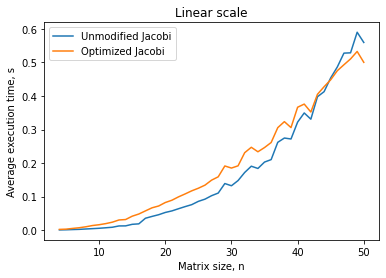

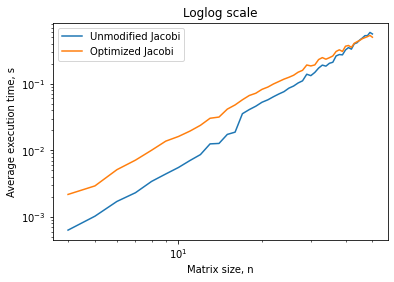

In [409]:
complexity_plots(num_tests=10,max_size=50,min_size=4)

In [411]:
len(unmod_times)

49